In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplstereonet
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_excel('Barnett_fractures.xls')
barnet = df.loc[:, df.columns[:5]]
barnet.columns = ['depth', 'strike', 'dip', 'dip_direction', 'aperture']

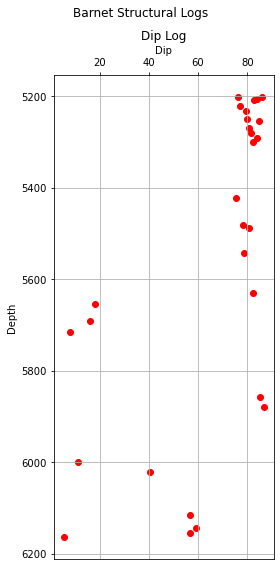

In [3]:
fig, ax = plt.subplots(figsize=[4, 8])
fig.suptitle('Barnet Structural Logs')

ax.scatter(barnet['dip'], barnet['depth'], color='red')
ax.invert_yaxis()
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.set_title('Dip Log')
ax.set_xlabel('Dip')
ax.set_ylabel('Depth')
ax.grid()



plt.tight_layout()

In [4]:
overburden = pd.read_csv('Overburden.csv')

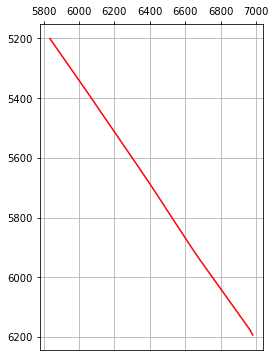

In [5]:
fig, ax = plt.subplots(figsize=[4, 6])
ax.plot(overburden['Sv (psi)'], overburden['Depth (ft)'], color='red')
ax.invert_yaxis()
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.grid()

In [6]:
overburden = overburden.interpolate()
overburden['Sv (psi/ft)'] = overburden['Sv (psi)']/overburden['Depth (ft)']
overburden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Depth (ft)   1991 non-null   float64
 1   Sv (psi)     1991 non-null   float64
 2   Sv (psi/ft)  1991 non-null   float64
dtypes: float64(3)
memory usage: 46.8 KB


In [7]:
data = pd.merge_asof(barnet, overburden, left_on='depth', right_on='Depth (ft)', direction='nearest')

In [8]:
data['Sv (psi/ft)'] = data['Sv (psi)']/data['depth']
data['Pp'] = 0.48*data['depth']
data['Sh'] = 0.65*data['depth']
data['SH'] = 0.65*data['depth']


In [9]:
def Shear_Normal(sigma_1, sigma_3, Pp, beta):
    beta = np.deg2rad(beta)
    tau = 0.5*(sigma_1 - sigma_3)*np.sin(2*beta)
    sigma_n = 0.5*(sigma_1 + sigma_3) + 0.5*(sigma_1 - sigma_3)*np.cos(2*beta) - Pp
    return tau, sigma_n

In [10]:
data['shear stress'], data['normal stress'] = Shear_Normal(data['Sv (psi)'], data['Sh'], data['Pp'], data['dip'])
data['shear/normal'] = data['shear stress']/data['normal stress']
num1 = (data['shear/normal'] > 0.75).sum()
num2 = (data['shear/normal'] > 0.45).sum()

print(f'Mu = 0.75, critically stressed faults = {num1}')
print(f'Mu = 0.45, critically stressed faults = {num2}')
num1

Mu = 0.75, critically stressed faults = 0
Mu = 0.45, critically stressed faults = 10


0

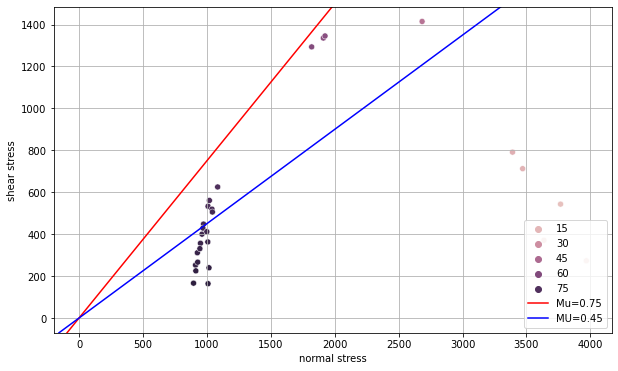

In [11]:
fig, ax = plt.subplots(figsize=[10, 6])
sns.scatterplot(data= data, x='normal stress', y='shear stress', hue='dip', ax=ax)
ax.axline(xy1=(0, 0), slope=0.75, color='red', label='Mu=0.75')
ax.axline(xy1=(0, 0), slope=0.45, color='blue', label='MU=0.45')
ax.legend(loc='lower right')
ax.grid()

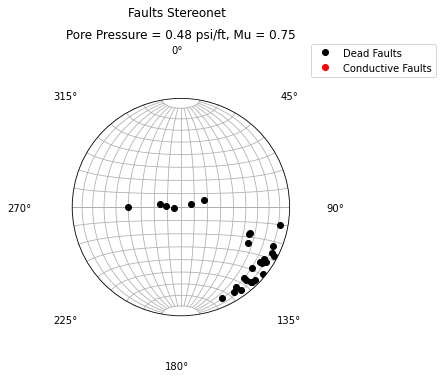

In [12]:
conductive = data[data['shear/normal'] > 0.75]
dead = data[data['shear/normal'] < 0.75]
fig, ax = mplstereonet.subplots(figsize=[4, 4])
fig.suptitle('Faults Stereonet', y=1.2)
ax.pole(dead['strike'], dead['dip'], color='black', label='Dead Faults')
ax.pole(conductive['strike'], conductive['dip'], color='red', label='Conductive Faults')
ax.set_title('Pore Pressure = 0.48 psi/ft, Mu = 0.75', y=1.25)
ax.legend(loc=(1.1, 1.1))
ax.grid()

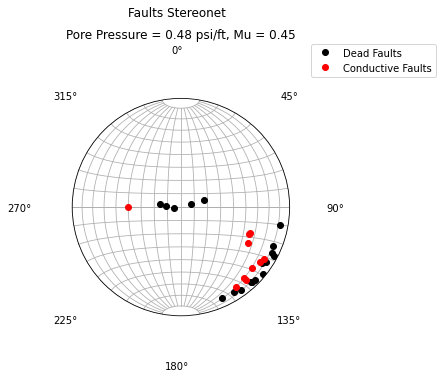

In [13]:
conductive = data[data['shear/normal'] > 0.45]
dead = data[data['shear/normal'] < 0.45]
fig, ax = mplstereonet.subplots(figsize=[4, 4])
fig.suptitle('Faults Stereonet', y=1.2)
ax.pole(dead['strike'], dead['dip'], color='black', label='Dead Faults')
ax.pole(conductive['strike'], conductive['dip'], color='red', label='Conductive Faults')
ax.set_title('Pore Pressure = 0.48 psi/ft, Mu = 0.45', y=1.25)
ax.legend(loc=(1.1, 1.1))
ax.grid()

In [14]:
data['Pp'] = 0.52*data['depth']

In [15]:
data['shear stress'], data['normal stress'] = Shear_Normal(data['Sv (psi)'], data['Sh'], data['Pp'], data['dip'])
data['shear/normal'] = data['shear stress']/data['normal stress']
num1 = (data['shear/normal'] > 0.75).sum()
num2 = (data['shear/normal'] > 0.45).sum()

print(f'Mu = 0.75, critically stressed faults = {num1}')
print(f'Mu = 0.45, critically stressed faults = {num2}')

Mu = 0.75, critically stressed faults = 3
Mu = 0.45, critically stressed faults = 16


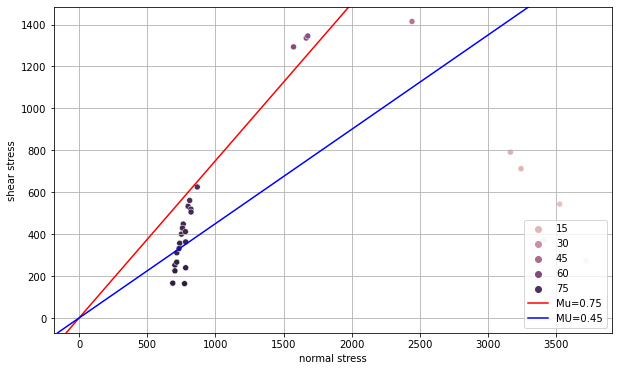

In [16]:
fig, ax = plt.subplots(figsize=[10, 6])
sns.scatterplot(data= data, x='normal stress', y='shear stress', hue='dip', ax=ax)
ax.axline(xy1=(0, 0), slope=0.75, color='red', label='Mu=0.75')
ax.axline(xy1=(0, 0), slope=0.45, color='blue', label='MU=0.45')
ax.legend(loc='lower right')
ax.grid()

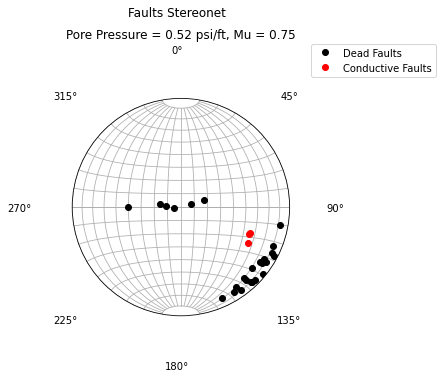

In [17]:
conductive = data[data['shear/normal'] > 0.75]
dead = data[data['shear/normal'] < 0.75]
fig, ax = mplstereonet.subplots(figsize=[4, 4])
fig.suptitle('Faults Stereonet', y=1.2)
ax.pole(dead['strike'], dead['dip'], color='black', label='Dead Faults')
ax.pole(conductive['strike'], conductive['dip'], color='red', label='Conductive Faults')
ax.set_title('Pore Pressure = 0.52 psi/ft, Mu = 0.75', y=1.25)
ax.legend(loc=(1.1, 1.1))
ax.grid()

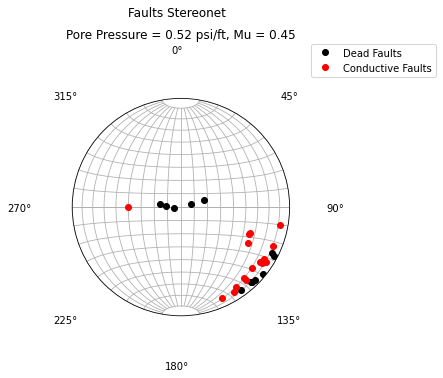

In [18]:
conductive = data[data['shear/normal'] > 0.45]
dead = data[data['shear/normal'] < 0.45]
fig, ax = mplstereonet.subplots(figsize=[4, 4])
fig.suptitle('Faults Stereonet', y=1.2)
ax.pole(dead['strike'], dead['dip'], color='black', label='Dead Faults')
ax.pole(conductive['strike'], conductive['dip'], color='red', label='Conductive Faults')
ax.set_title('Pore Pressure = 0.52 psi/ft, Mu = 0.45', y=1.25)
ax.legend(loc=(1.1, 1.1))
ax.grid()